## 1.데이터 불러오기

In [ ]:
import os # 디렉토리를 join 하기 위해서 사용
import numpy as np # 행렬 연산 및 기본연산
import pandas as pd # 데이터 분석 및 전처리
import matplotlib as mpl # 모델 시각화
import matplotlib.pyplot as plt
import seaborn as sns # 통계 시각화

In [ ]:
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)
print('matplotlib version :', mpl.__version__)

numpy version : 1.21.6
pandas version : 1.3.5
matplotlib version : 3.2.2


In [ ]:
BASE_DIR = './data'
train_path = os.path.join(BASE_DIR, 'train.csv')
test_path = os.path.join(BASE_DIR, 'test.csv')

# 안전하게 path를 합치는 경우 이렇게 사용

In [ ]:
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
target = data['credit']

## 2.데이터 살펴보기

데이터를 받으면 확인해야할 것

1. 컬럼 별 데이터의 형태 (Type)
2. 데이터 개수 (Shape)
3. 데이터 결측치 (Missing Value) 
4. 데이터 통계값 (Statistics)
5. 데이터의 분포 (Distribution)
6. 데이터의 예외값 (Outlier)



### 2-1.데이터 대략적으로 이해하기

In [ ]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


- `index`: 인덱스
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득
- `income_type`: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- `DAYS_EMPLOYED`: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형													
- `family_size`: 가족 규모
- `begin_month`: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

범주형과 수치형을 분류해서 살펴본다.

In [ ]:
for dt_idx, dt in zip(data.dtypes.index, data.dtypes):
    print(dt_idx,dt)

index int64
gender object
car object
reality object
child_num int64
income_total float64
income_type object
edu_type object
family_type object
house_type object
DAYS_BIRTH int64
DAYS_EMPLOYED int64
FLAG_MOBIL int64
work_phone int64
phone int64
email int64
occyp_type object
family_size float64
begin_month float64
credit float64


In [ ]:
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']



In [ ]:
data.describe().transpose() # .T 
# use style 

,count,mean,std,min,25%,50%,75%,max
index,26457.0,13228.000000,7637.622372,0.0,6614.0,13228.0,19842.0,26456.0
child_num,26457.0,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0
income_total,26457.0,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,26457.0,-15958.053899,4201.589022,-25152.0,-19431.0,-15547.0,-12446.0,-7705.0
DAYS_EMPLOYED,26457.0,59068.750728,137475.427503,-15713.0,-3153.0,-1539.0,-407.0,365243.0
FLAG_MOBIL,26457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,26457.0,0.224742,0.417420,0.0,0.0,0.0,0.0,1.0
phone,26457.0,0.294251,0.455714,0.0,0.0,0.0,1.0,1.0
email,26457.0,0.091280,0.288013,0.0,0.0,0.0,0.0,1.0
family_size,26457.0,2.196848,0.916717,1.0,2.0,2.0,3.0,20.0


In [ ]:
data.describe(include='O').T

,count,unique,top,freq
gender,26457,2,F,17697
car,26457,2,N,16410
reality,26457,2,Y,17830
income_type,26457,5,Working,13645
edu_type,26457,5,Secondary / secondary special,17995
family_type,26457,5,Married,18196
house_type,26457,6,House / apartment,23653
occyp_type,18286,18,Laborers,4512


In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,26457,NaN,NaN,NaN,13228,7637.62,0,6614,13228,19842,26456
gender,26457,2,F,17697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car,26457,2,N,16410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reality,26457,2,Y,17830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_num,26457,NaN,NaN,NaN,0.428658,0.747326,0,0,0,1,19
income_total,26457,NaN,NaN,NaN,187307,101878,27000,121500,157500,225000,1.575e+06
income_type,26457,5,Working,13645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edu_type,26457,5,Secondary / secondary special,17995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_type,26457,5,Married,18196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_type,26457,6,House / apartment,23653,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2-2.데이터 결측치, 분포, 예외치 확인하기

`0 != Null = {}`

<AxesSubplot:>

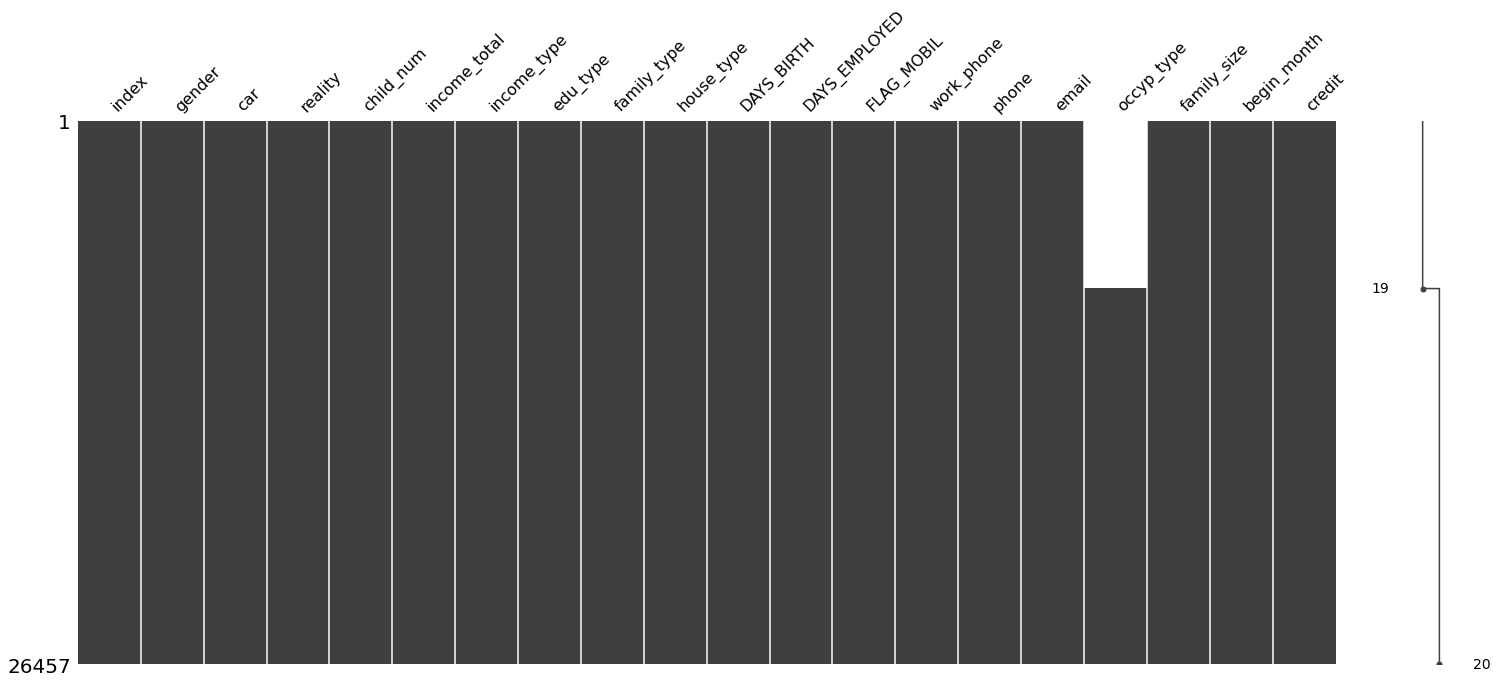

In [ ]:
import missingno as msno

msno.matrix(data,sort = 'ascending') # sort = 'ascending' or 'descending'

In [ ]:
(data.isna().sum() / len(data)) * 100

index             0.000000
gender            0.000000
car               0.000000
reality           0.000000
child_num         0.000000
income_total      0.000000
income_type       0.000000
edu_type          0.000000
family_type       0.000000
house_type        0.000000
DAYS_BIRTH        0.000000
DAYS_EMPLOYED     0.000000
FLAG_MOBIL        0.000000
work_phone        0.000000
phone             0.000000
email             0.000000
occyp_type       30.884076
family_size       0.000000
begin_month       0.000000
credit            0.000000
dtype: float64

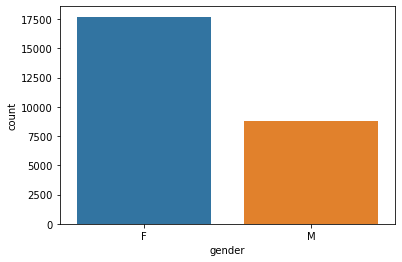

In [ ]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x='gender')
plt.show()

C:\Users\cv002\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


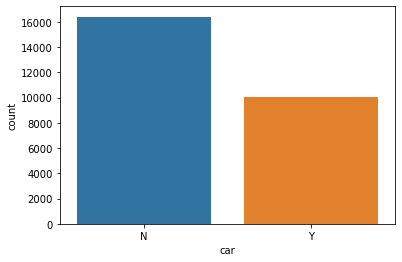

In [ ]:
fig, ax = plt.subplots(1,1)
sns.countplot(data['car'])
plt.show()

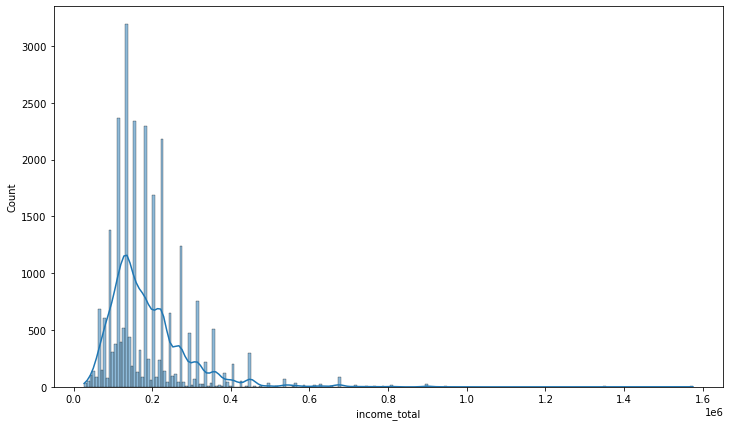

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
sns.histplot(data['income_total'],kde=True,ax=ax)
plt.show()

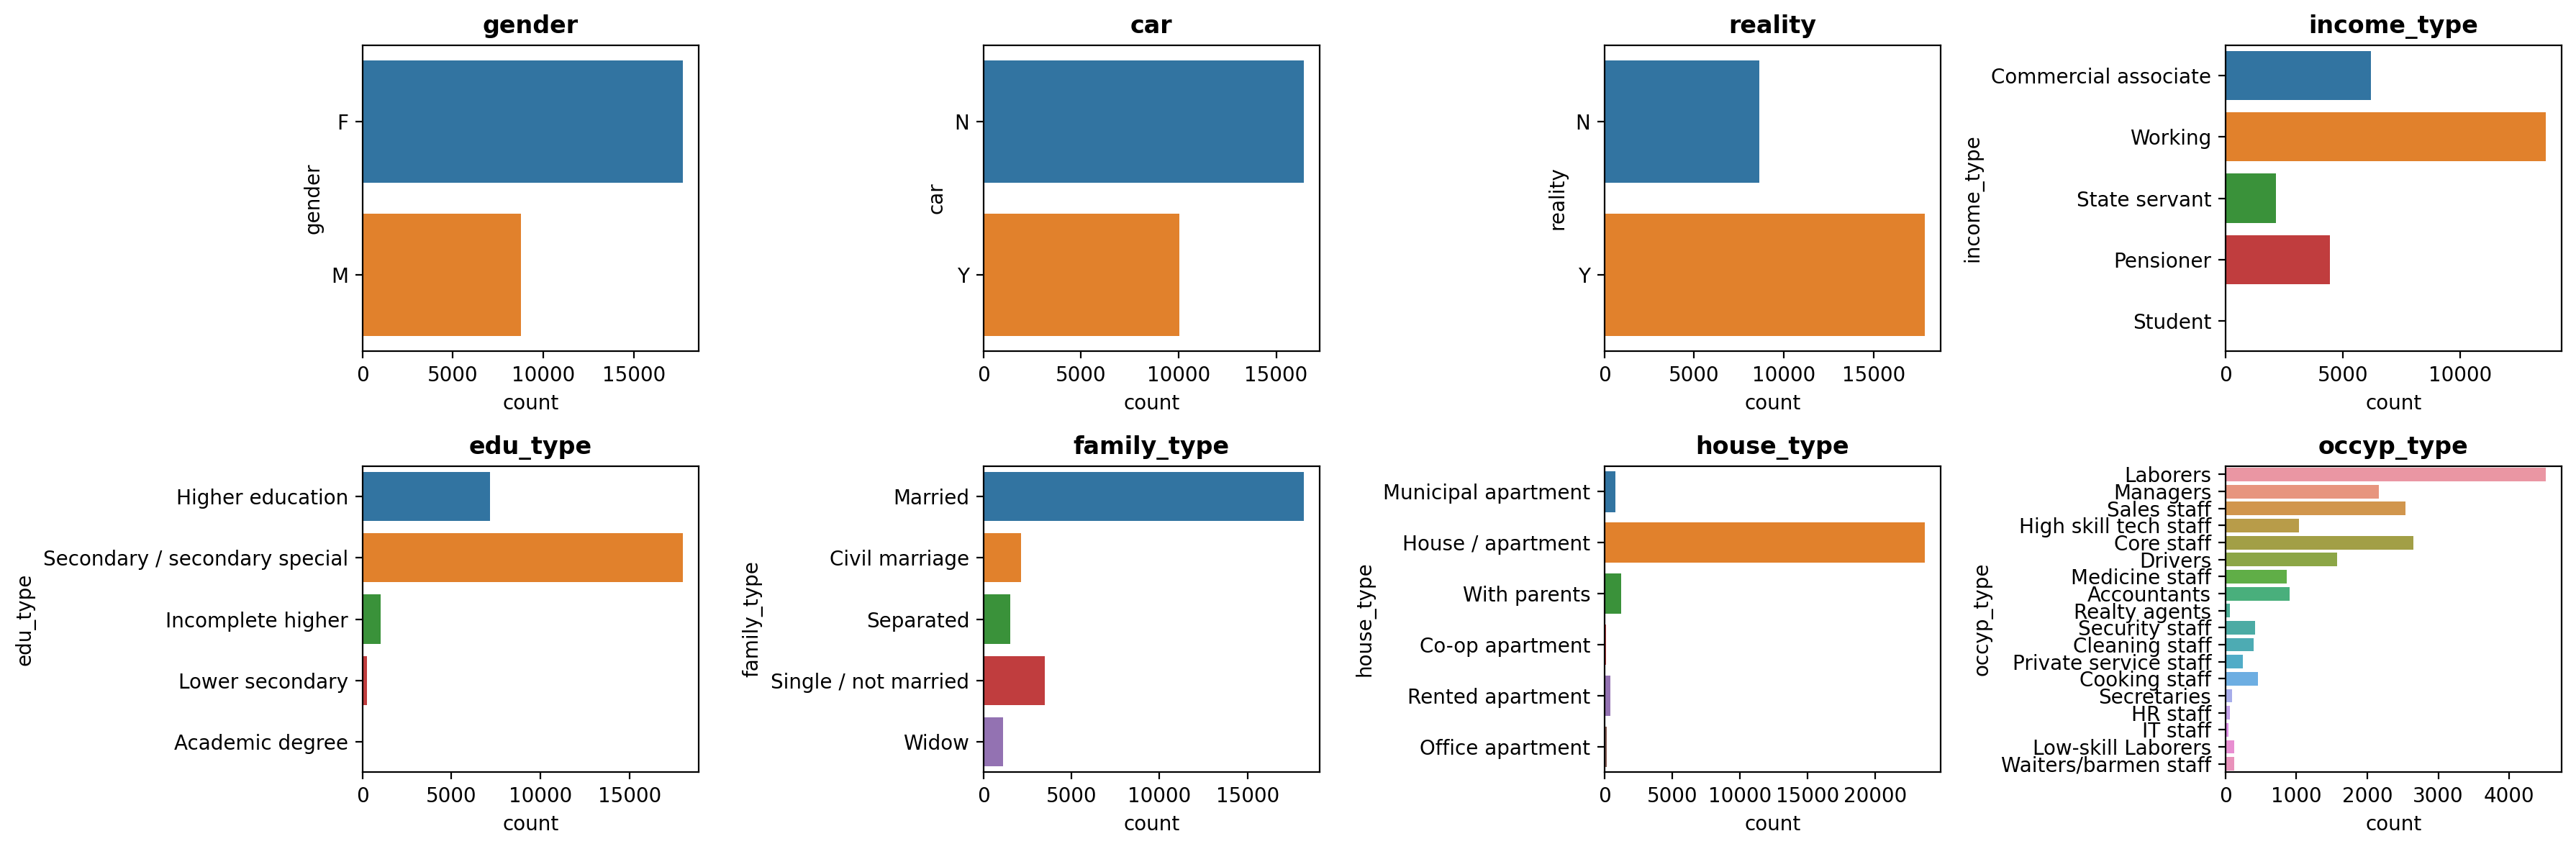

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(18,6), dpi = 200) 

for col, ax in zip(cat_columns , ax.flatten()):
    sns.countplot(data=data, y=col, ax=ax) # 이렇게 'y =  ' 하면 세로 그래프로 바뀜
    ax.set_title(col, fontweight='bold')
    
fig.tight_layout() # 각각의 그래프가 겹치지 않게 만들어줌
plt.show()

In [ ]:
# 여기서 직업같은 경우는 너무 많아서 모델이 안좋아질수 있음 
# 그래서 기준을 정해서 묶어주는 것도 좋음

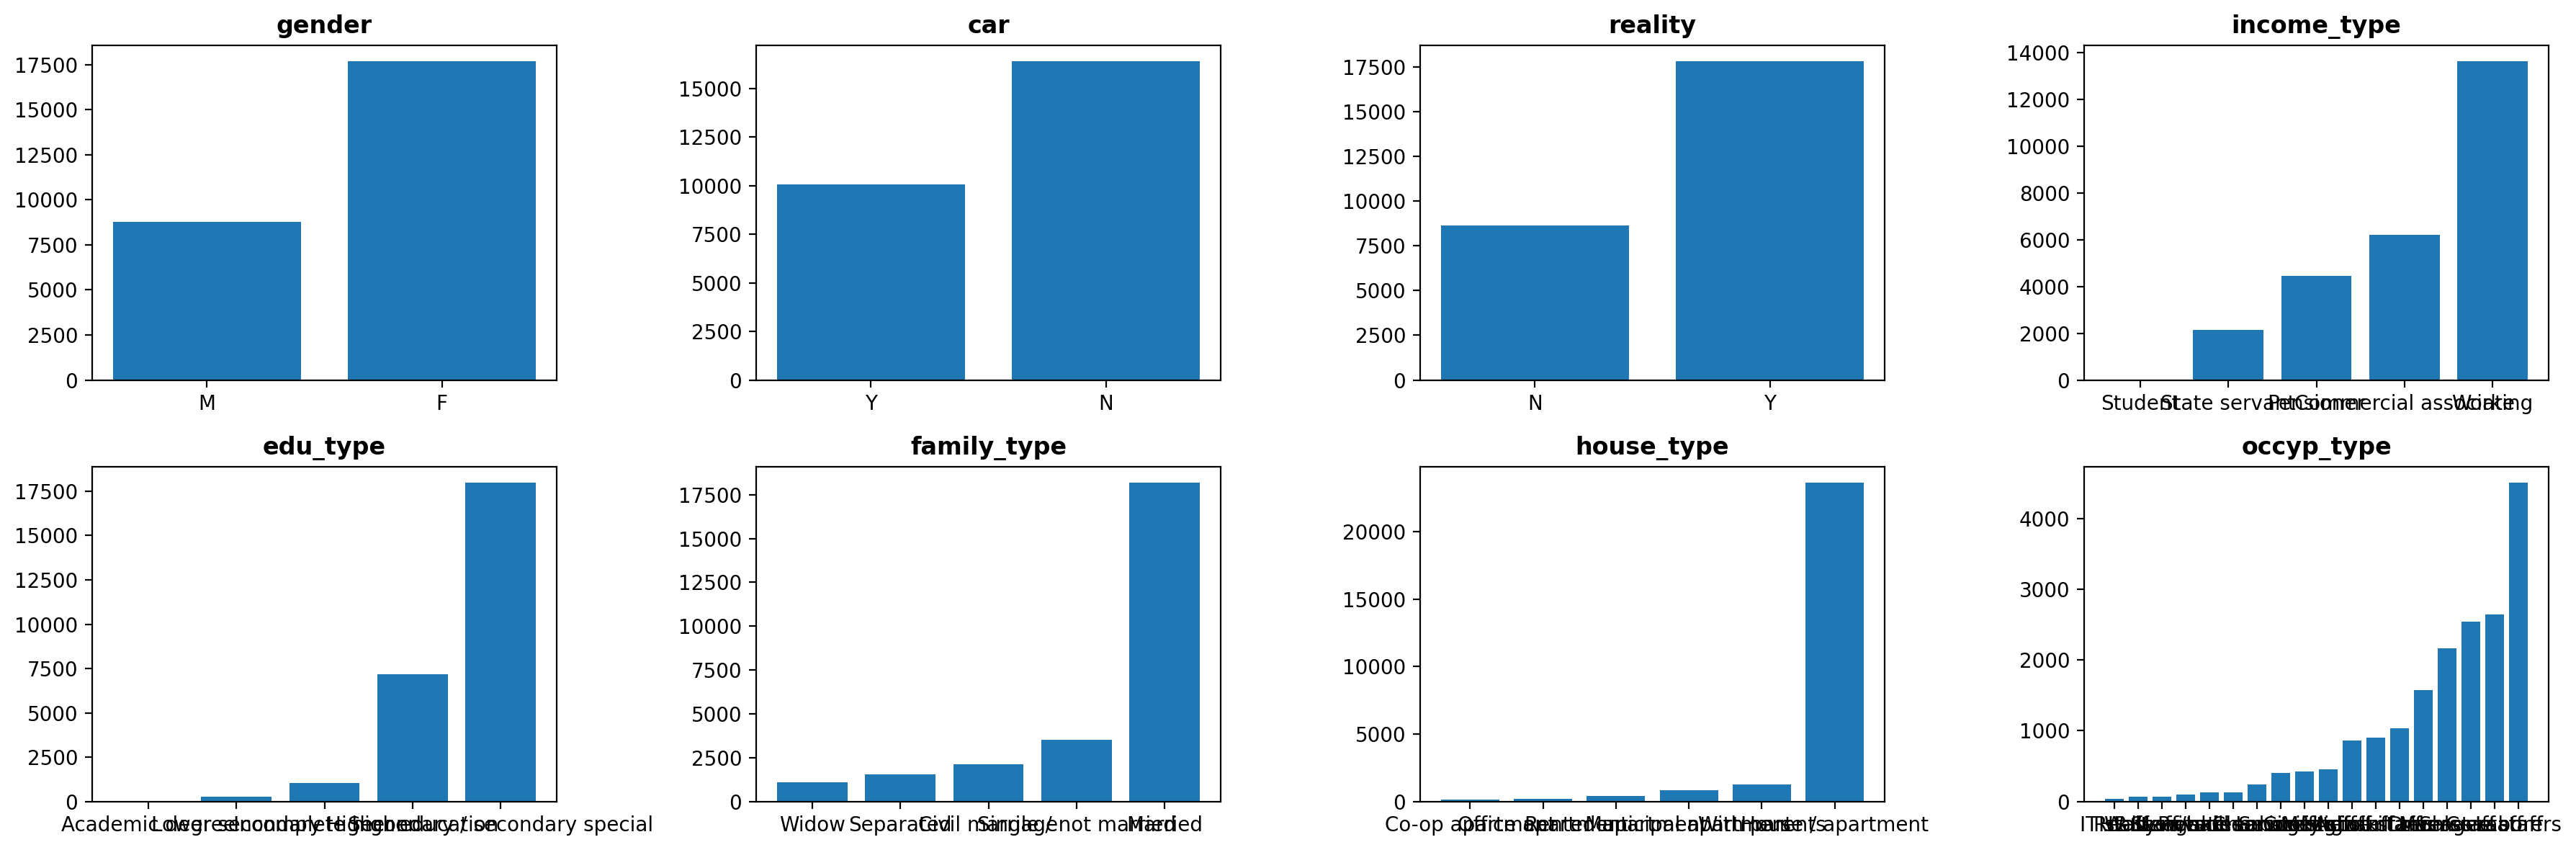

In [ ]:
fig, ax = plt.subplots(2,4, figsize=(18,6), dpi = 200)
for col, ax in zip(cat_columns , ax.flatten()):
    tmp_cnt = data[col].value_counts().sort_values()
    ax.bar(tmp_cnt.index,tmp_cnt)
    ax.set_title(col, fontweight='bold')
#     sns.countplot(data=data, y=col, ax=ax)
#     ax.set_title(col, fontweight='bold')
    
fig.tight_layout()
plt.show()

In [ ]:
data['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

> value_counts를 사용한다면..?

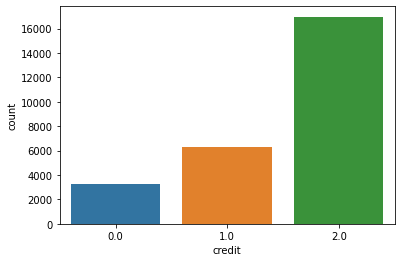

In [ ]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x='credit')
plt.show()

In [ ]:
data['credit'].value_counts().sort_values()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [ ]:
data['credit'].value_counts().sort_index()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [ ]:
data['credit'].value_counts().sort_index() / len(data) * 100

0.0    12.178252
1.0    23.687493
2.0    64.134256
Name: credit, dtype: float64

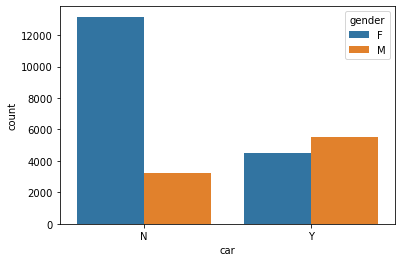

In [ ]:
sns.countplot(data=data, x='car', hue='gender')
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

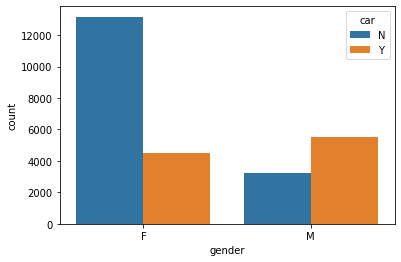

In [ ]:
sns.countplot(data=data, x='gender', hue='car')

In [ ]:
data.groupby('gender')['car'].value_counts() / len(data) *100

gender  car
F       N      49.763768
        Y      17.125902
M       Y      20.848925
        N      12.261405
Name: car, dtype: float64

In [ ]:
data.groupby(['gender','car'])['reality'].value_counts() / len(data) *100

gender  car  reality
F       N    Y          34.569301
             N          15.194466
        Y    Y          11.588615
             N           5.537287
M       N    Y           7.608572
             N           4.652833
        Y    Y          13.625884
             N           7.223041
Name: reality, dtype: float64

In [ ]:
data['income_total'].describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

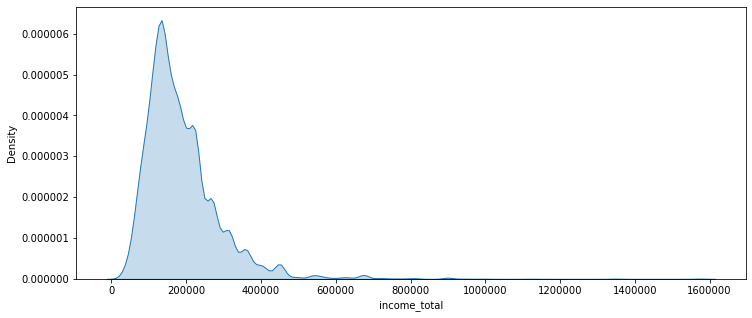

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.kdeplot(data=data, x='income_total',ax=ax, fill=True)

plt.ticklabel_format(style='plain') 
# 이렇게 해줘야 데이터 프레임내의 값이 나옴
# 이렇게 안하면 0.0 ~ 1.0의 값이 나옴
plt.show()

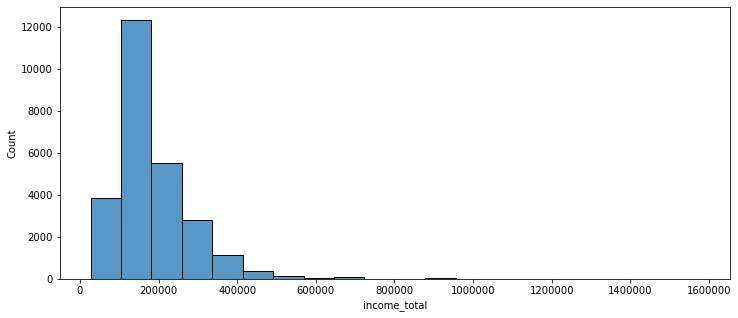

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
# kernel density estimation
# sns.kdeplot(data=data, x='income_total', ax=ax, 
#             fill=True, bw_method=0.1, cut=0
#            )
sns.histplot(data=data, x='income_total', ax=ax, fill=True,bins=20)

plt.ticklabel_format(style='plain')
plt.show()

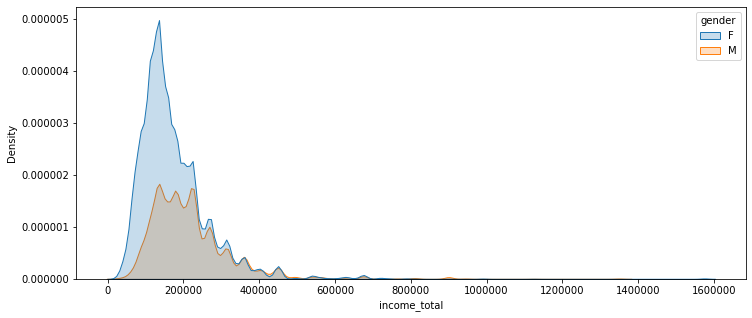

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.kdeplot(data=data, 
            x='income_total', hue='gender',
            ax=ax, fill=True,
            bw_method=0.1) # bw_method를 사용하면 실제값이랑 비슷하게 나타냄 
                          # 근사값을 적게하는거

plt.ticklabel_format(style='plain')
plt.show()

C:\Users\cv002\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


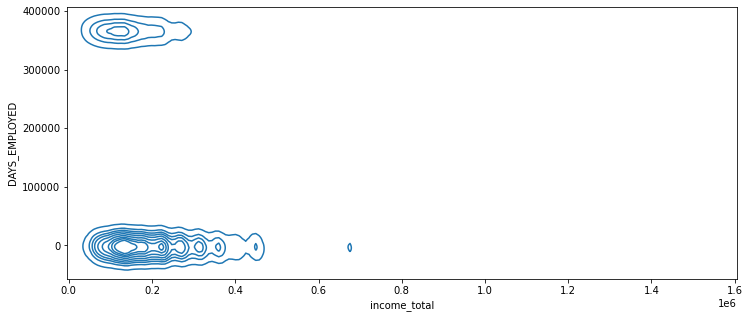

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(12,5))
sns.kdeplot(data=data, x='income_total', y='DAYS_EMPLOYED',
            bw_method=0.1,
            ax=ax)
# ax.ticklabel_format(style='plain')
plt.show()

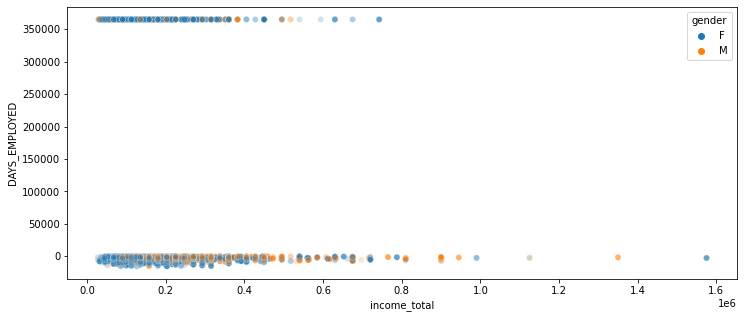

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
sns.scatterplot(data=data, x='income_total', y='DAYS_EMPLOYED',
                hue='gender',
                alpha=0.2,
                ax=ax)
# ax.ticklabel_format(style='plain')
plt.show()

## 3.데이터 스케일링


> 주의 > 스케일링은 변수의 분포를 변경하지 않습니다. 




### 3-1.스케일링을 하는 이유

> 변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.

Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.

<div class="alert alert-block alert-danger">
    <b>주의</b> 스케일링은 변수의 분포를 변경하지 않습니다.
</div>

### 3-2.Min-Max Scaling

- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
- 최댓값을 1, 최솟값을 0으로 변경합니다.

수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. 

따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 



직접 구현도 크게 어렵지 않지만, `Sklearn`에서 Min-Max Scaler는 preprocessing 패키지에 있습니다. 

#### Reference

- [Scikit-learn Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)

In [ ]:
income_data = data[['income_total']].values
income_data

array([[202500.],
       [247500.],
       [450000.],
       ...,
       [292500.],
       [171000.],
       [ 81000.]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [ ]:
scaler.fit(income_data)

print(scaler.data_min_)
print(scaler.data_max_)

[27000.]
[1575000.]


In [ ]:
scaled_data = scaler.transform(income_data)
scaled_data = scaler.fit_transform(income_data) # 항상 train에서만 사용할 것


[0.11337209] [202500.]


하지말 것!! train+test => min/max를 뽑고 => min/max scaler

In [ ]:
num_data = data[num_columns].values

In [ ]:
scaler = MinMaxScaler()
scaler.fit(num_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
print(scaler.data_min_)
print(scaler.data_max_)

[ 0.0000e+00  0.0000e+00  2.7000e+04 -2.5152e+04 -1.5713e+04  1.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00 -6.0000e+01  0.0000e+00]
[ 2.64560e+04  1.90000e+01  1.57500e+06 -7.70500e+03  3.65243e+05
  1.00000e+00  1.00000e+00  1.00000e+00  1.00000e+00  2.00000e+01
  0.00000e+00  2.00000e+00]


In [ ]:
scaled_data = scaler.transform(num_data)
scaled_data = pd.DataFrame(data=scaled_data, columns=num_columns)
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0.000000,0.000000,0.113372,0.644982,0.028885,0.0,0.0,0.0,0.0,0.052632,0.900000,0.5
1,0.000038,0.052632,0.142442,0.789362,0.037204,0.0,0.0,0.0,1.0,0.105263,0.916667,0.5
2,0.000076,0.000000,0.273256,0.347624,0.029607,0.0,0.0,1.0,0.0,0.052632,0.633333,1.0
3,0.000113,0.000000,0.113372,0.576833,0.035755,0.0,0.0,1.0,0.0,0.052632,0.383333,0.0
4,0.000151,0.000000,0.084302,0.579756,0.035721,0.0,0.0,0.0,0.0,0.052632,0.566667,1.0


In [ ]:
data[num_columns].head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [ ]:
data[num_columns].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0.000000,0.000000,0.113372,0.644982,0.028885,0.0,0.0,0.0,0.0,0.052632,0.900000,0.5
1,0.000038,0.052632,0.142442,0.789362,0.037204,0.0,0.0,0.0,1.0,0.105263,0.916667,0.5
2,0.000076,0.000000,0.273256,0.347624,0.029607,0.0,0.0,1.0,0.0,0.052632,0.633333,1.0
3,0.000113,0.000000,0.113372,0.576833,0.035755,0.0,0.0,1.0,0.0,0.052632,0.383333,0.0
4,0.000151,0.000000,0.084302,0.579756,0.035721,0.0,0.0,0.0,0.0,0.052632,0.566667,1.0


In [ ]:
scaled_data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.500000,0.022561,0.103557,0.526964,0.196300,0.0,0.224742,0.294251,0.091280,0.062992,0.564612,0.759780
std,0.288692,0.039333,0.065813,0.240820,0.360870,0.0,0.417420,0.455714,0.288013,0.048248,0.275992,0.351141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.061047,0.327907,0.032970,0.0,0.000000,0.000000,0.000000,0.052632,0.350000,0.500000
50%,0.500000,0.000000,0.084302,0.550524,0.037206,0.0,0.000000,0.000000,0.000000,0.052632,0.600000,1.000000
75%,0.750000,0.052632,0.127907,0.728263,0.040178,0.0,0.000000,1.000000,0.000000,0.105263,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
income_min = data['income_total'].min()
income_max = data['income_total'].max()

data['income_total'].apply(lambda x : x/income_max)

0        0.128571
1        0.157143
2        0.285714
3        0.128571
4        0.100000
           ...   
26452    0.142857
26453    0.114286
26454    0.185714
26455    0.108571
26456    0.051429
Name: income_total, Length: 26457, dtype: float64

### 3-3.Standard Scaling

데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.

데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

`Sklearn`에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### Reference

- [Scikit-learn, Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [ ]:
numeric_data = data[num_columns].values
scaled_data = scaler.fit_transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data,columns=num_columns)

In [ ]:
data[num_columns].head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [ ]:
data[num_columns].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125


In [ ]:
scaled_data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,26457.0,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04
mean,6.875267e-17,3.289923e-17,4.726746e-17,1.020547e-16,5.505585e-18,0.0,3.719627e-17,-5.156450e-17,5.237020e-18,-3.007929e-17,6.069572e-17,-1.149459e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.0,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.731985e+00,-5.735993e-01,-1.573539e+00,-2.188248e+00,-5.439748e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-1.305605e+00,-2.045789e+00,-2.163785e+00
25%,-8.659927e-01,-5.735993e-01,-6.459445e-01,-8.265948e-01,-4.526113e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,-7.776147e-01,-7.398300e-01
50%,0.000000e+00,-5.735993e-01,-2.925752e-01,9.783481e-02,-4.408708e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,1.282242e-01,6.841248e-01
75%,8.659927e-01,7.645293e-01,3.699921e-01,8.359029e-01,-4.326364e-01,0.0,-5.384173e-01,1.548696e+00,-3.169372e-01,8.761348e-01,8.528952e-01,6.841248e-01
max,1.731985e+00,2.485084e+01,1.362134e+01,1.964307e+00,2.227162e+00,0.0,1.857295e+00,1.548696e+00,3.155199e+00,1.942093e+01,1.577566e+00,6.841248e-01


기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차 값을 가지고 있었습니다.

Standard 스케일링된 데이터를 살펴보면, 평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

### 3-4.Log Transformation

변수의 범위를 조정하는 Min-Max Scaling과 Standard Scaling을 확인했습니다.<br>
이번에는 치우친 분포(skew)의 형태를 보정해주는 방법 중 하나인 Log Transformation에 대해 배우겠습니다.

로그 변환은 어떤 변수의 범위가 양수인 경우 사용할 수 있으며, 각 변수에 대해 자연 로그를 취하는 연산 입니다.

해당 연산을 적용하면, 다음과 같은 왼쪽으로 치우친 분포(왼쪽)를 좋은 형태(오른쪽)의 정규 분포의 형태로 만들어줄 수 있습니다.

이는 왼쪽 그림에서 오른쪽으로 치우친 큰 값들을 작게(지수로) 표현함으로써 분포를 왼쪽으로 당기는 효과를 줄 수 있기 때문입니다.

<img src='https://miro.medium.com/max/1620/1*O2R4nH0nR6d3bOxaYU10lg.png'>

#### ref
- [Log Transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)

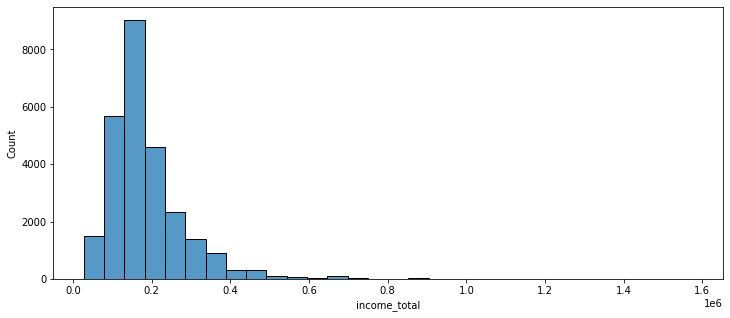

In [ ]:
# 로그 변환 전
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
sns.histplot(data=data, x='income_total', bins=30)
plt.show()

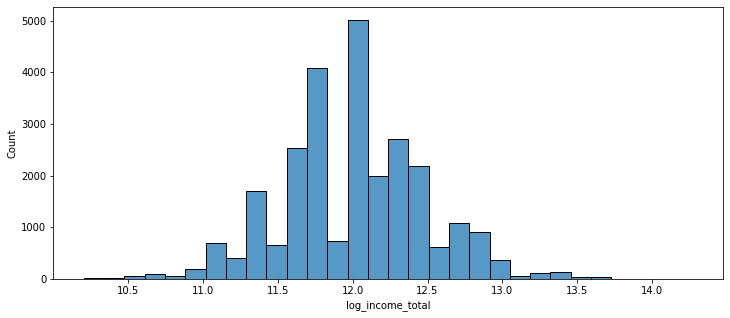

In [ ]:
# 로그 변환 후
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
scaled_data['log_income_total'] = np.log(data['income_total'])
sns.histplot(data=scaled_data, x='log_income_total', bins=30)
plt.show()

### 3-5.Box-Cox, Yeo-Johnson, Quantile Transformation

여러가지 변환이 있습니다. 

세가지 변환 모두 치우친 분포의 데이터를 정규 분포로 보정해주는 효과가 있으며,

Box-Cox 변환의 경우 Log 변환과 함께 양수에만 적용할 수 있는 변환이고, 

Yeo-Johnsong 변환은 Box-Cox 변환의 제약인 음수를 가진 변수에서도 변환을 할 수 있는 변환입니다.

Quantile 변환은 가장 자주 발생하는 값(the most frequent values.) 주위로 분포를 조정하며, 이상치의 영향을 감소시켜주는 특징도 있습니다.

- Box-Cox 변환은 Lambda 값에 따라 변환이 달라지게 되는데, Lambda 값이 0일 경우 Log 변환과 동일합니다.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png'>

#### Reference
- [Scikit-learn PowerTransformer, Box-Cox, Yeo-Johnson Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
- [Scikit-learn Quantile Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)
- [Scikit-learn Map Data To Normal Dist](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py)

<AxesSubplot:>

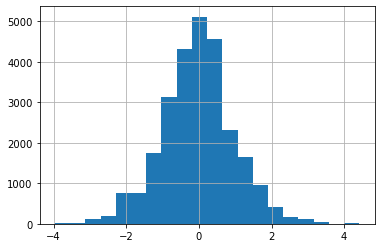

In [ ]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_income_total'] = trans.fit_transform(data['income_total'].values.reshape(-1, 1))
scaled_data['box_cox_income_total'].hist(bins=20)

<AxesSubplot:>

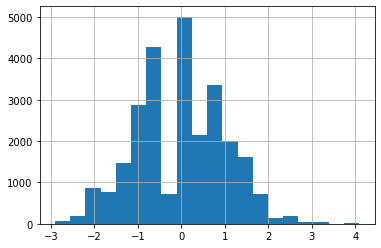

In [ ]:
# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['yeo_johnson_income_total'].hist(bins=20)

<AxesSubplot:>

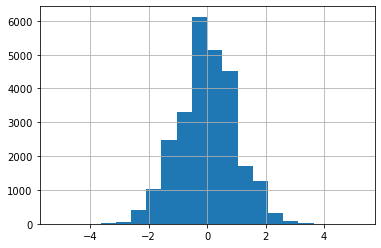

In [ ]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['quantile_income_total'].hist(bins=20)

## 4.Missing Values





### 4-1.대표 값을 사용한 결측치 처리

정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, 

가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다.

결측치를 확인하는 방법으로 missingno 라이브러리의 `matrix()` 메소드를 사용하거나 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

<div class="alert alert-block alert-danger">
    <b>주의</b> 결측치 처리는 가능하면 스케일링 작업 이전에 해주는 것이 좋습니다. 예를 들어 특정 컬럼의 결측치를 평균 값으로 대치하려고할 때 Standard Scaling을 진행하게되면 해당 컬럼의 결측치는 모두 0으로 대치될 수 있기 때문입니다. 
</div>

<AxesSubplot:>

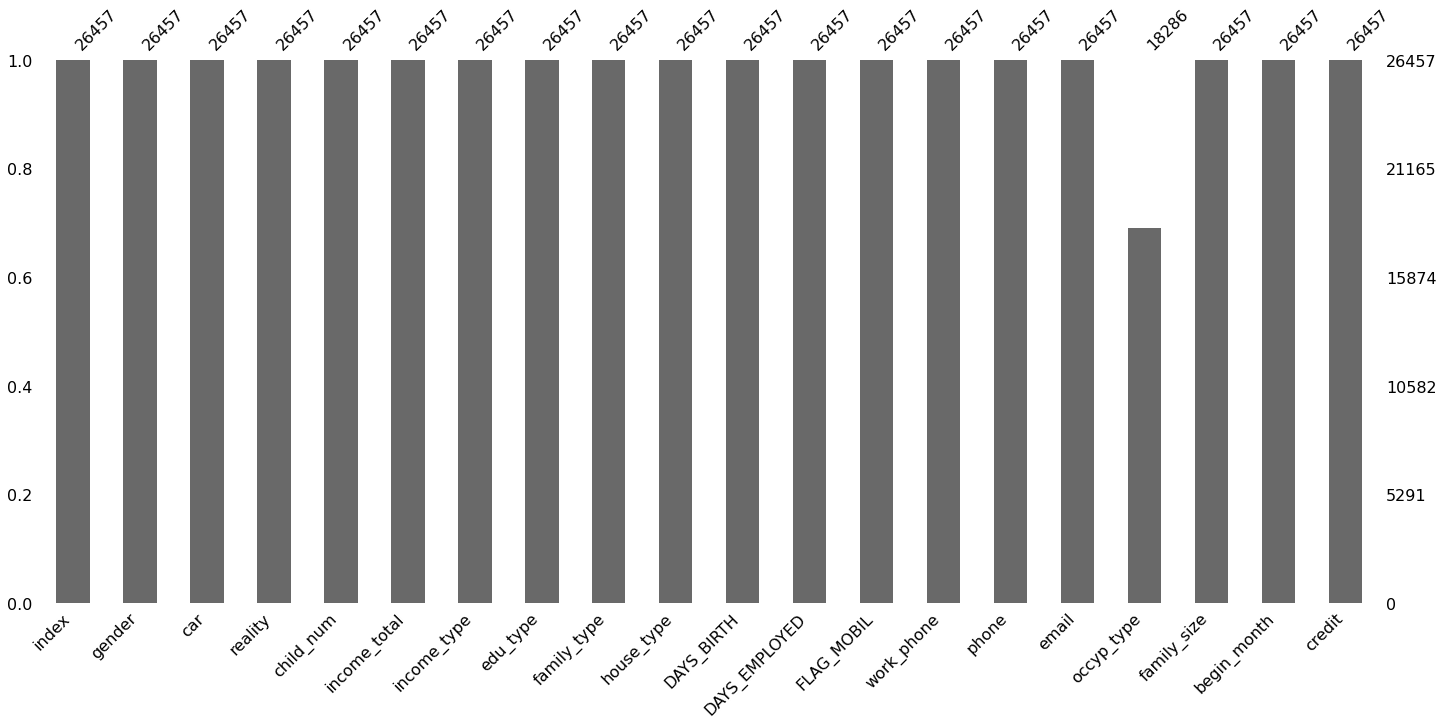

In [ ]:
msno.bar(data)

In [ ]:
na_list = pd.isna(data).sum()
na_list[na_list>0]

occyp_type    8171
dtype: int64

### 4-2.평균(mean)

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.

일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다.

평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.

평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.

$$ E(x) = {\sum x \over n}$$

In [ ]:
mean_df = data.copy()

In [ ]:
row = pd.isna(mean_df['occyp_type'])
col = 'occyp_type'

mean_df.loc[row,col]

0        NaN
8        NaN
14       NaN
18       NaN
19       NaN
        ... 
26439    NaN
26441    NaN
26443    NaN
26449    NaN
26453    NaN
Name: occyp_type, Length: 8171, dtype: object

In [ ]:
for c in num_columns:
    mean_df.loc[pd.isna(data[c]),c] = data[c].mean()
    # NaN 값들에 평균값 넣어주기

In [ ]:
mean_df.groupby(['gender','car','reality'])[['income_total']].mean()

income_total
gender car reality               
F      N   N        154554.490299
           Y        167189.738410
       Y   N        193006.403754
           Y        205431.017613
M      N   N        195305.476036
           Y        200526.225782
       Y   N        223291.233909
           Y        227946.340361

### 4-3.Median(중간값) 

중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다.

데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.

중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [ ]:
data.describe().T[['50%']]

,50%
index,13228.0
child_num,0.0
income_total,157500.0
DAYS_BIRTH,-15547.0
DAYS_EMPLOYED,-1539.0
FLAG_MOBIL,1.0
work_phone,0.0
phone,0.0
email,0.0
family_size,2.0


In [ ]:
median_df = data.copy()

for c in num_columns:
    median_df.loc[pd.isna(data[c]), c] = data[c].median()
    # NaN 값을 median 값으로 채워줌

In [ ]:
pd.isna(median_df[num_columns]).sum().sum()

0

### 4-4.Iterative Impute (R 언어의 MICE 패키지)

Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. 
(회귀 : 연속된 데이터 예측 주가 같은거)


결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

1. 각 결측치를 해당 변수의 평균으로 채워넣는다. 
2. 대체할 변수의 결측치는 제외한 상태로 해당 변수의 결측치를 회귀모델을 이용하여 예측한다.
3. 다른 변수에서도 해당 방식을 반복한다.
4. 모든 변수에 대해 반복 후 해당 이터레이션에서 맨 처음에 할당했던 값과의 차이를 계산한다.
5. 해당 값의 차이가 0이 될 때(수렴)까지 반복한다.

#### Reference
- [Scikit-Learn, Iterative Imputer (MICE)](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice)
- [MICE 알고리즘 설명](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
impute_df = data.copy()

In [ ]:
imp_mean = IterativeImputer(random_state=0)
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])

In [ ]:
pd.isna(impute_df[num_columns]).sum().sum()

0

### 4-5.Mode(최빈값)

최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.

  - 수치형 데이터에서는 사용을 잘 안함 
    - 연봉이 같은 경우는 없는 경우가 많으니..
    

In [ ]:
mode_df = data.copy()

for c in mode_df:
    mode_df.loc[pd.isna(data[c]),c] = data[c].mode()[0]

In [ ]:
mode_df['gender'].mode()[0] # 최빈값

'F'

In [ ]:
pd.DataFrame(mode_df.groupby(['car','reality'])['gender'].value_counts())

gender
car reality gender        
N   N       F         4020
            M         1231
    Y       F         9146
            M         2013
Y   N       M         1911
            F         1465
    Y       M         3605
            F         3066

In [ ]:
pd.isna(mode_df[cat_columns]).sum().sum()

0

## 5.Categorical Variable to Numeric Variable 

이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. 
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. 

범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.



### 5-1.Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>

- 소형 : 0 
- 중형 : 1 
- 대형 : 2 

라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding도 Sklearn의 preprocessing 패키지에 있습니다.

#### Reference
- [Scikit-Learn Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data['family_type'].unique()

array(['Married', 'Civil marriage', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [ ]:
le.fit(data['family_type'])

LabelEncoder()

In [ ]:
le.classes_

array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [ ]:
label_encoded = le.transform(data['family_type'])

In [ ]:
for idx, val in enumerate(le.classes_):
    print(idx,val)

0 Civil marriage
1 Married
2 Separated
3 Single / not married
4 Widow


<AxesSubplot:xlabel='family_type', ylabel='count'>

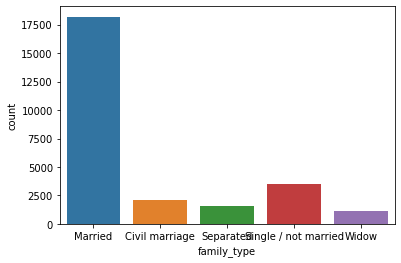

In [ ]:
sns.countplot(data=data, x='family_type')

In [ ]:
result = pd.DataFrame({
    'family_type' : data['family_type'].values,
    'label' : label_encoded})
result

,family_type,label
0,Married,1
1,Civil marriage,0
2,Married,1
3,Married,1
4,Married,1
...,...,...
26452,Married,1
26453,Separated,2
26454,Civil marriage,0
26455,Single / not married,3


### 5-2.One-hot Encoding

원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. 

예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.

- 소형 : `[1, 0, 0]` 
- 중형 : `[0, 1, 0]` 
- 대형 : `[0, 0, 1]` 

원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. 

이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.

#### Reference
- [Scikit-Learn One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [ ]:
data[cat_columns].describe(include='O').T

,count,unique,top,freq
gender,26457,2,F,17697
car,26457,2,N,16410
reality,26457,2,Y,17830
income_type,26457,5,Working,13645
edu_type,26457,5,Secondary / secondary special,17995
family_type,26457,5,Married,18196
house_type,26457,6,House / apartment,23653
occyp_type,18286,18,Laborers,4512


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(data[['family_type']])

OneHotEncoder(sparse=False)

In [ ]:
ohe.categories_

[array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object)]

In [ ]:
one_hot_encoded = ohe.transform(data[['family_type']])
one_hot_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
result = pd.DataFrame( data=one_hot_encoded, columns=ohe.categories_, dtype=int)

result ['family_type'] = data['family_type']
result

,Civil marriage,Married,Separated,Single / not married,Widow,family_type
0,0,1,0,0,0,Married
1,1,0,0,0,0,Civil marriage
2,0,1,0,0,0,Married
3,0,1,0,0,0,Married
4,0,1,0,0,0,Married
...,...,...,...,...,...,...
26452,0,1,0,0,0,Married
26453,0,0,1,0,0,Separated
26454,1,0,0,0,0,Civil marriage
26455,0,0,0,1,0,Single / not married


In [ ]:
edu_type = data['edu_type'].unique()
edu_type

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [ ]:
edu_dict = {
    'Higher education' : 0, 
    'Secondary / secondary special' : 1, 
    'Incomplete higher' : 2, 
    'Lower secondary' : 3, 
    'Academic degree' : 4
}


data['edu_type'].map(edu_dict) 
data['edu_type'].apply(lambda x : edu_dict.get(x, -1) ) 


0        0
1        1
2        0
3        1
4        0
        ..
26452    1
26453    0
26454    1
26455    2
26456    1
Name: edu_type, Length: 26457, dtype: int64

In [ ]:
# https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

## 6.Test

In [ ]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv(train_path)
data = data.drop(['credit'], axis=1)
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)

decision_tree = decision_tree.fit(data[num_columns], target)

In [ ]:
result = decision_tree.predict_proba(test_data[num_columns])

result

array([[0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       ...,
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844]])

In [ ]:
answer = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv'))

answer.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [ ]:
answer['0'] = result[:, 0]
answer['1'] = result[:, 1]
answer['2'] = result[:, 2]

answer

,index,0,1,2
0,26457,0.111929,0.189723,0.698348
1,26458,0.111929,0.189723,0.698348
2,26459,0.111929,0.189723,0.698348
3,26460,0.111929,0.189723,0.698348
4,26461,0.138594,0.237122,0.624285
...,...,...,...,...
9995,36452,0.111929,0.189723,0.698348
9996,36453,0.111929,0.189723,0.698348
9997,36454,0.111929,0.189723,0.698348
9998,36455,0.111929,0.189723,0.698348


In [ ]:
answer.to_csv('test.csv', index=False)